In [1]:
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import librosa
import librosa.display
import matplotlib

Using TensorFlow backend.


In [2]:
model = load_model('model_2019-08-06_02:14:03.806195_augnetwork_withnegs_190804_1424/savedmodel.h5')

In [3]:
x_test = np.load('test_datasets/x_test.npy')
y_test = np.load('test_datasets/y_test.npy')
save_path = 'images/1plus/'

In [4]:
x_test.shape

(1007, 259, 64, 1)

In [5]:
y_test.shape

(1007, 259, 8)

In [6]:
x_test3d = x_test[:,:,:,0]
x_test3d.shape

(1007, 259, 64)

In [7]:
preds = model.predict(x_test)

In [9]:
threshold = 0.5
preds_w_threshold = model.predict(x_test)
preds_w_threshold[preds_w_threshold > threshold] = 1
preds_w_threshold[preds_w_threshold <= threshold] = 0

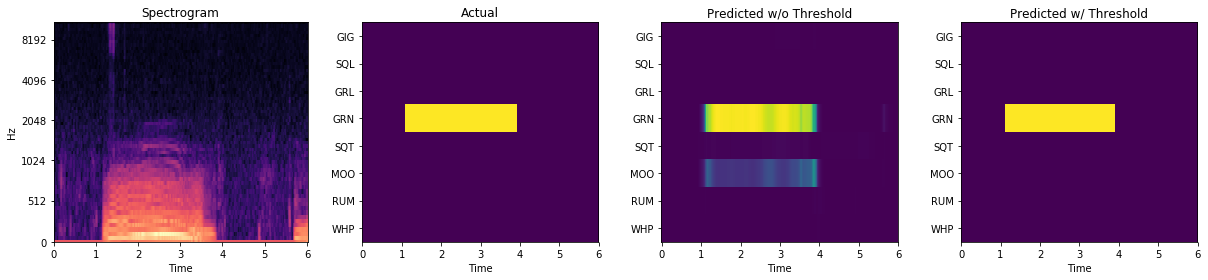

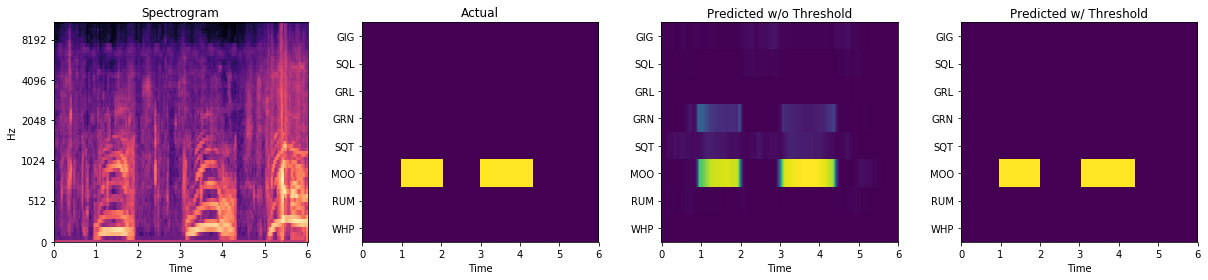

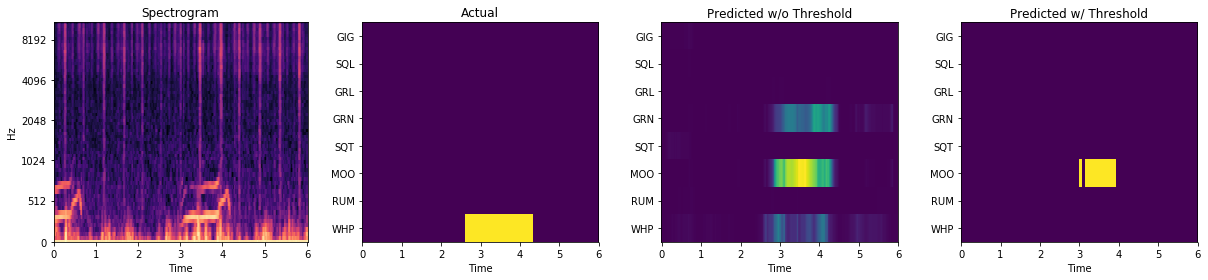

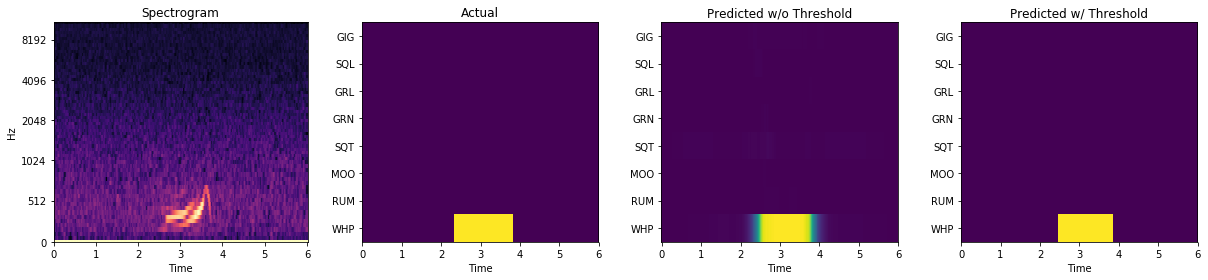

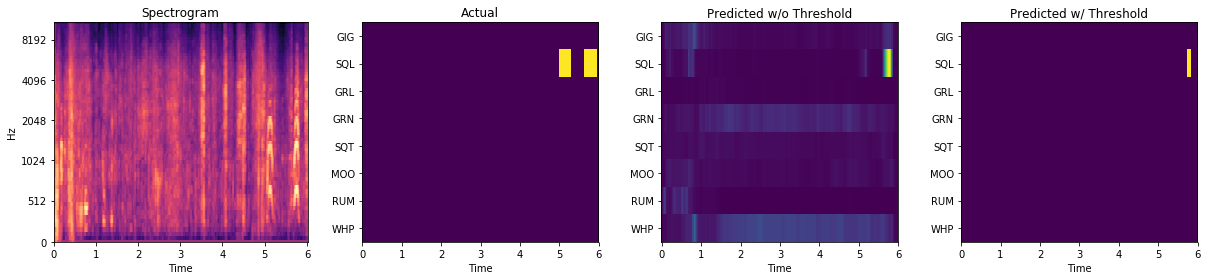

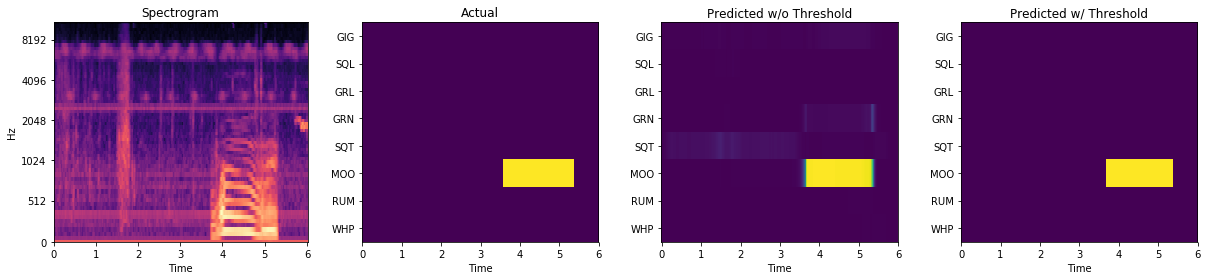

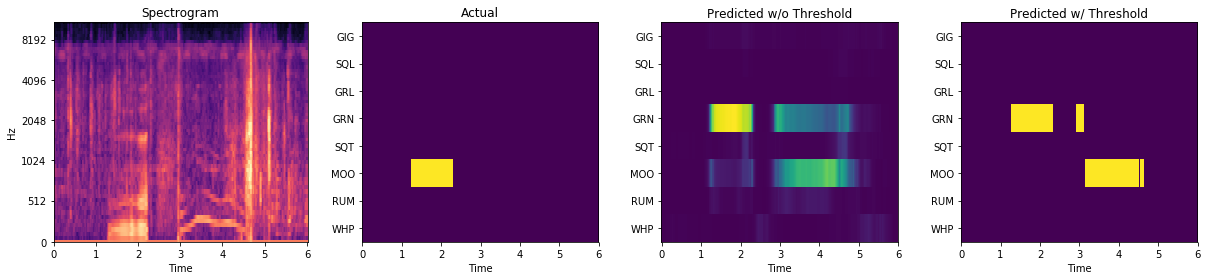

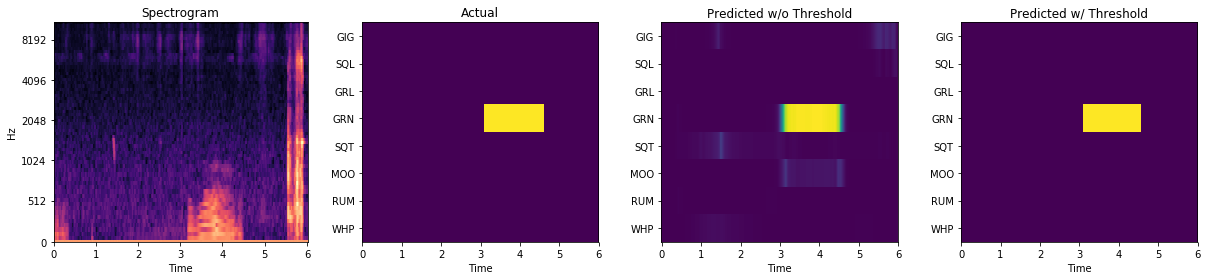

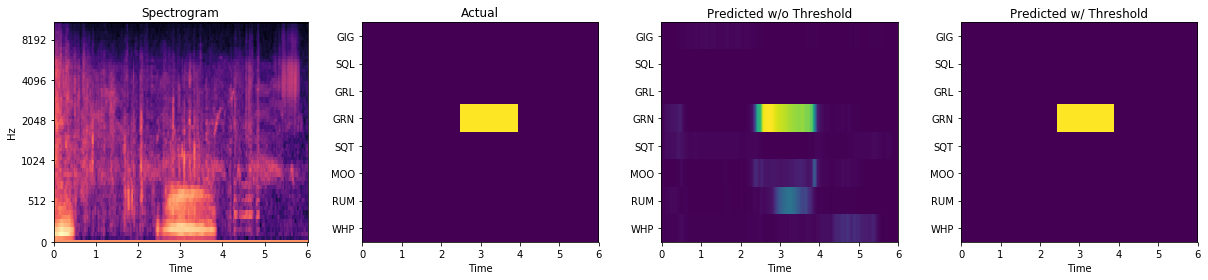

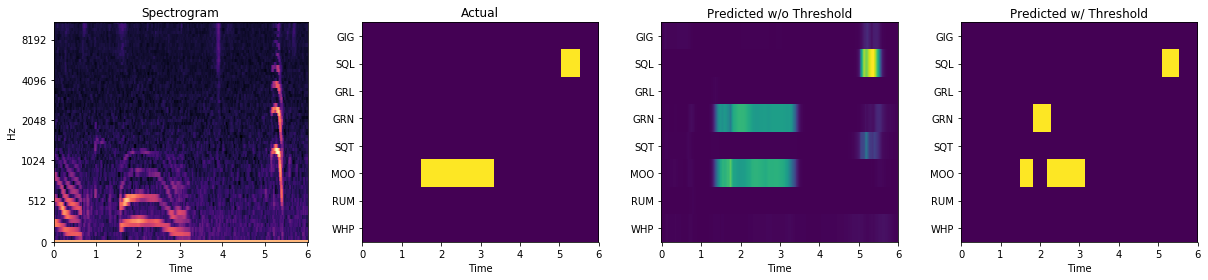

In [10]:
# comparing spectrograms with actual vs predicted labels
for i in range(len(x_test[0:10])):
    fig = plt.figure(figsize=(17, 4))
    a = fig.add_subplot(1,4,1)
    my_cmap = matplotlib.cm.get_cmap('magma')
    a.set_title('Spectrogram')
    librosa.display.specshow((librosa.power_to_db(x_test3d[i].T, ref=np.max)),
                             cmap=my_cmap, y_axis='mel', x_axis='time')
    b = fig.add_subplot(1,4,2)
    plt.xticks(np.arange(0, 259, 43.166666), [0, 1, 2, 3, 4, 5, 6])
    plt.yticks(np.arange(0, 8, 1), ['GIG', 'SQL', 'GRL', 'GRN', 'SQT', 'MOO', 'RUM', 'WHP'])
    b.set_title('Actual')
    plt.xlabel('Time')
    b.imshow(y_test[i, :, :].T, aspect='30')
    c = fig.add_subplot(1,4,3)
    plt.xticks(np.arange(0, 259, 43.166666), [0, 1, 2, 3, 4, 5, 6])
    plt.yticks(np.arange(0, 8, 1), ['GIG', 'SQL', 'GRL', 'GRN', 'SQT', 'MOO', 'RUM', 'WHP'])
    c.set_title('Predicted w/o Threshold')
    plt.xlabel('Time')
    c.imshow(preds[i, :, :].T, aspect='30')
    d = fig.add_subplot(1,4,4)
    plt.xticks(np.arange(0, 259, 43.166666), [0, 1, 2, 3, 4, 5, 6])
    plt.yticks(np.arange(0, 8, 1), ['GIG', 'SQL', 'GRL', 'GRN', 'SQT', 'MOO', 'RUM', 'WHP'])
    d.set_title('Predicted w/ Threshold')
    plt.xlabel('Time')
    d.imshow(preds_w_threshold[i, :, :].T, aspect='30')
    plt.tight_layout()
    #plt.savefig(save_path + str(i) + '.png')
    #plt.close()